In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
data_train = pd.read_excel("D:\Data_Train1.xlsx")
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<AxesSubplot:xlabel='Airline', ylabel='Price'>

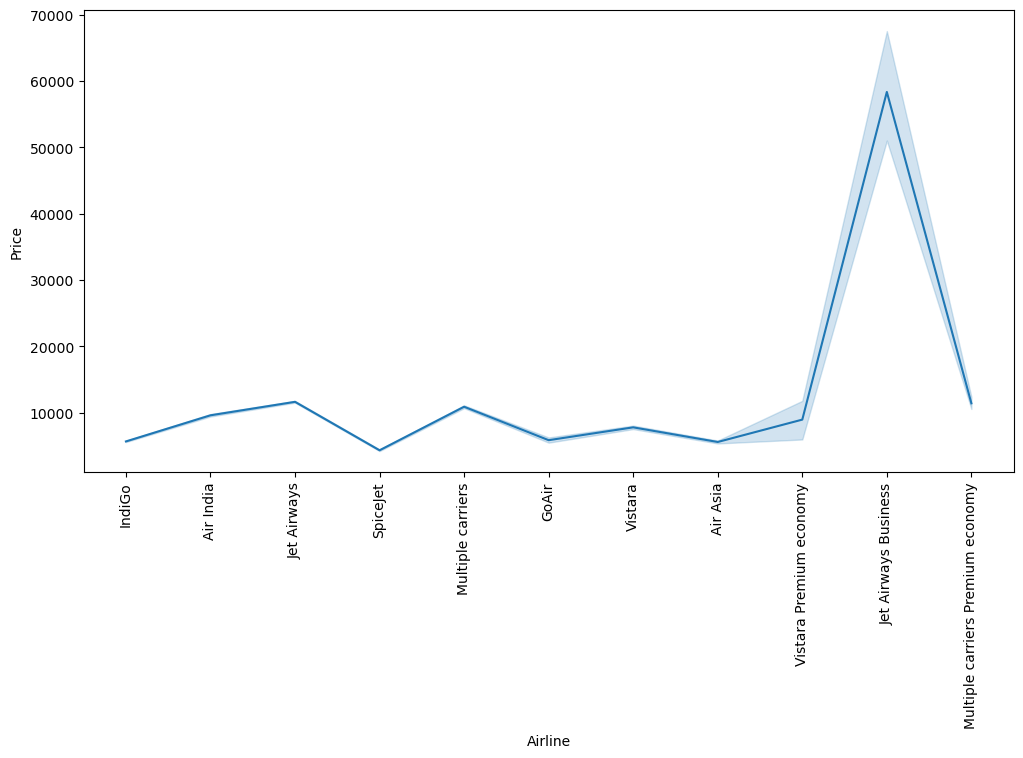

In [3]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(x='Airline',y='Price',data=data_train)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

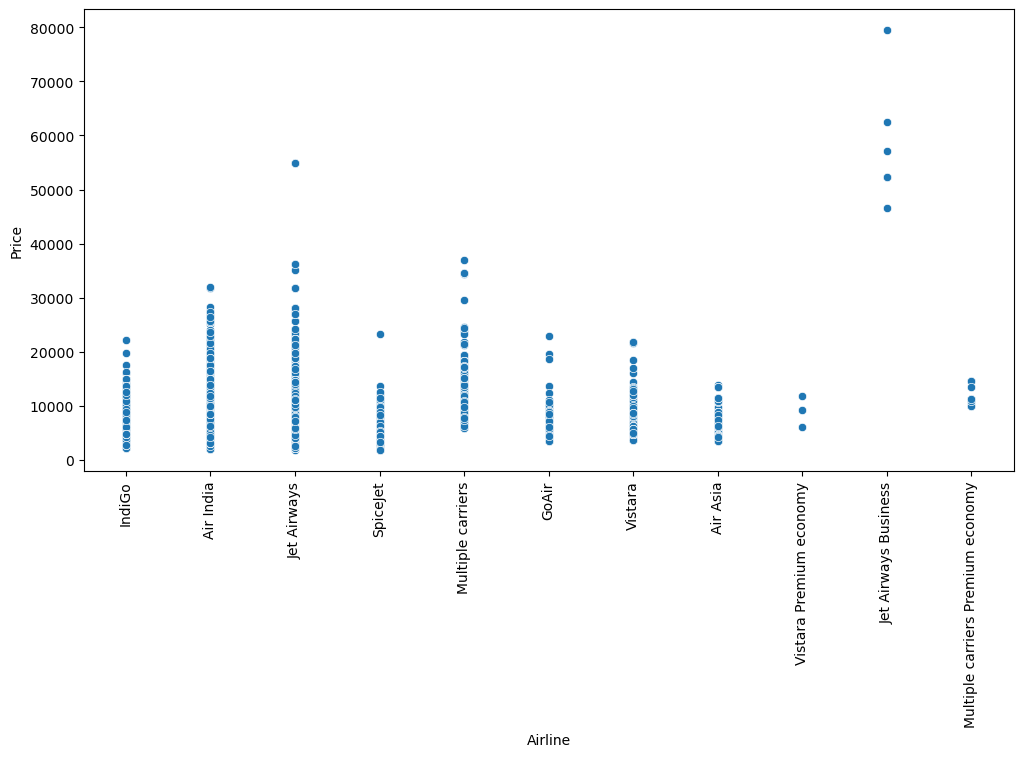

In [4]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.scatterplot(x='Airline',y='Price',data=data_train)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

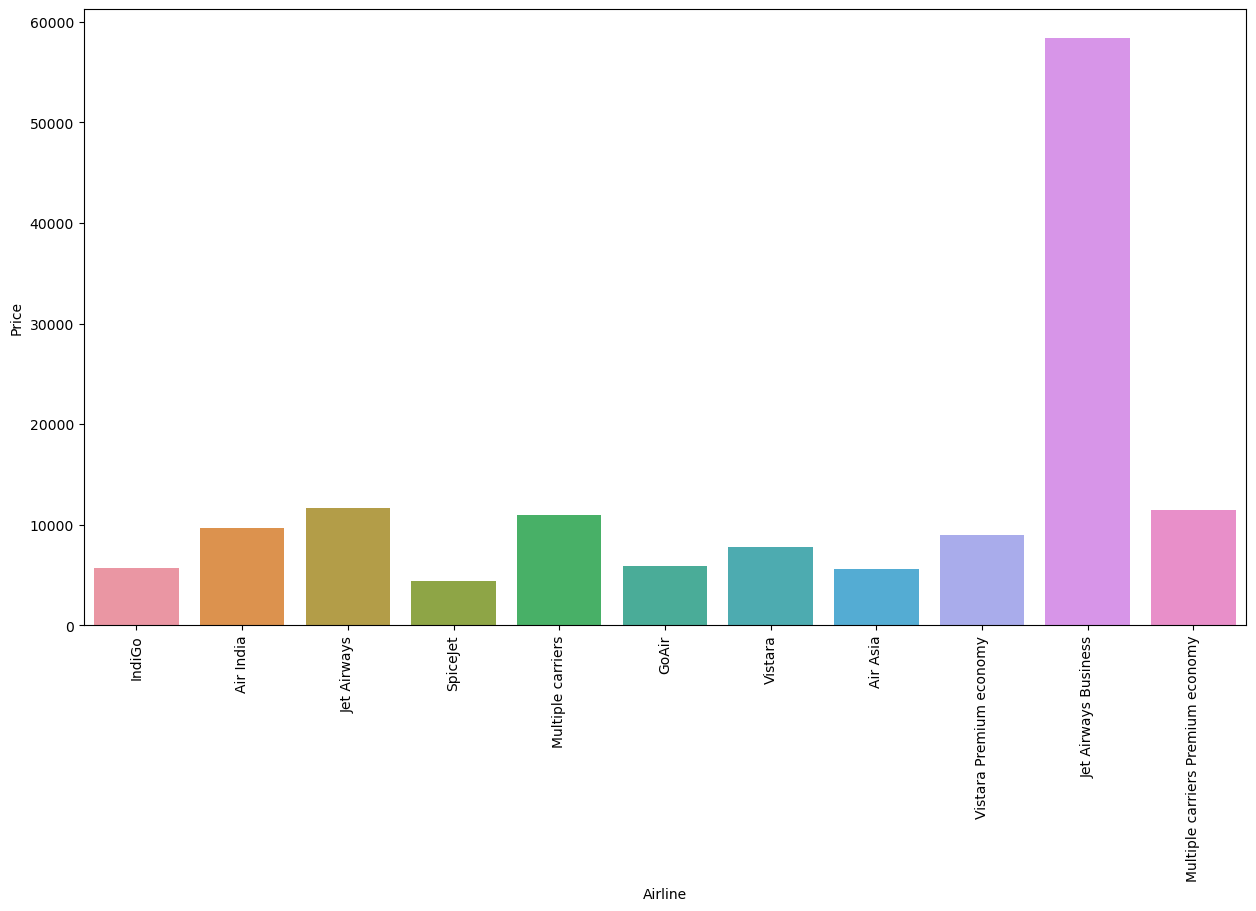

In [41]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Airline',y='Price',data=data_train,ci=None)

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Price'>

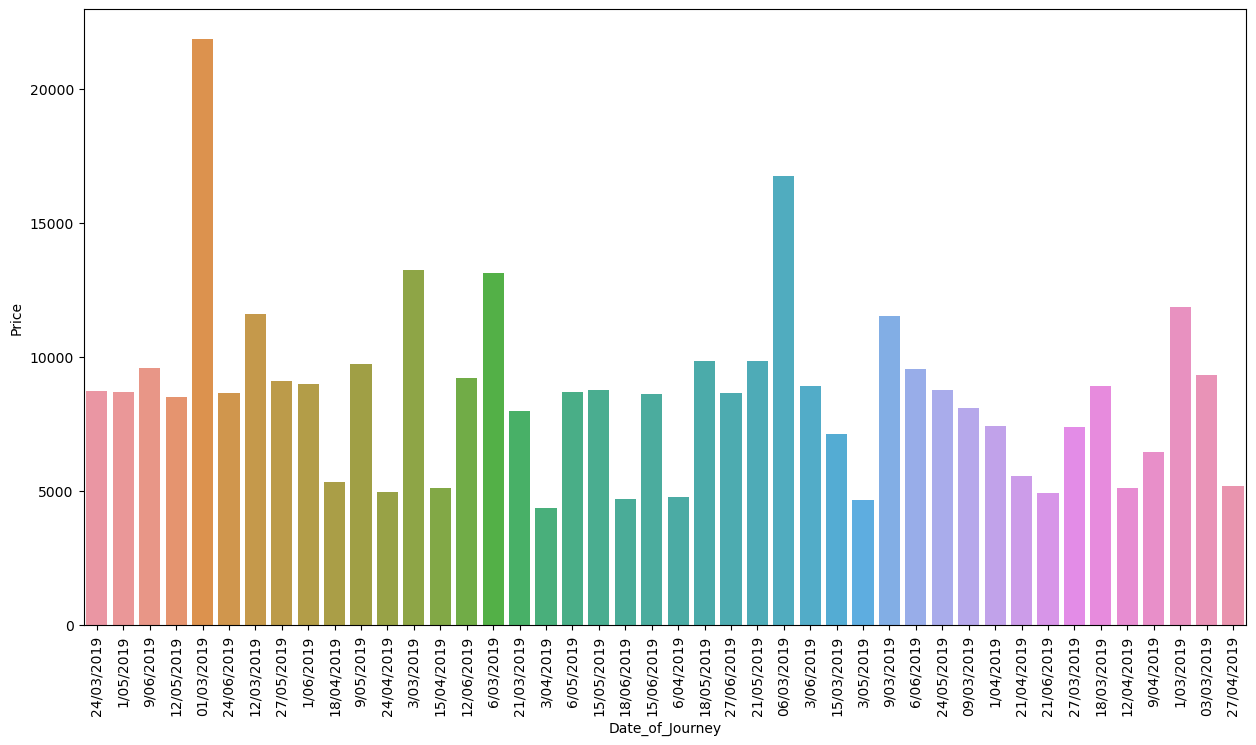

In [6]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Date_of_Journey',y='Price',data=data_train,ci=None)

<AxesSubplot:xlabel='Source', ylabel='Price'>

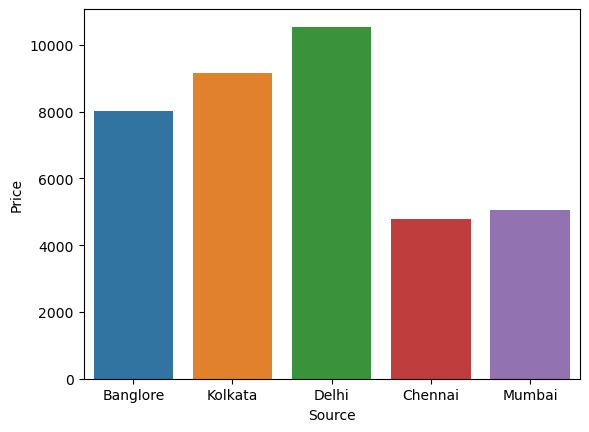

In [7]:
sns.barplot(x='Source',y='Price',data=data_train,ci=None)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

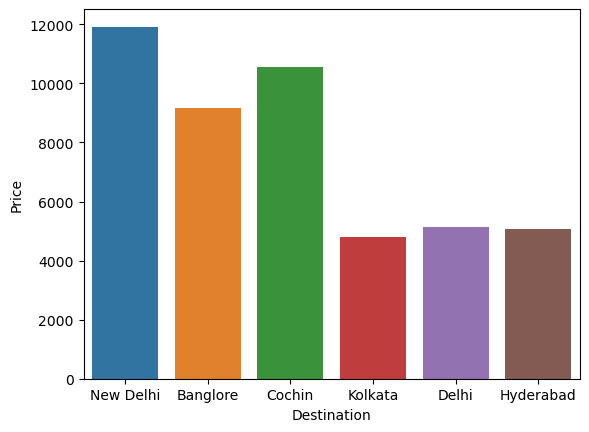

In [8]:
sns.barplot(x='Destination',y='Price',data=data_train,ci=None)

In [9]:
data_train.describe()

,Price
count,10682.000000
mean,9087.527242
std,4611.326569
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [11]:
data_train.nunique()

Airline              11
Date_of_Journey      44
Source                5
Destination           6
Route               127
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1869
dtype: int64

In [12]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df = data_train.dropna()

In [14]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [15]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
def Journey_day():
    df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
    df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
Journey_day()
df.drop(["Date_of_Journey"], axis=1, inplace=True)

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis=1, inplace=True)

df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [17]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10679,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10680,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [18]:
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_mins.append(int(duration[i].split()[1][:-1]))
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis=1, inplace=True)

In [19]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10678,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10679,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10680,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [20]:
airlines = pd.get_dummies(df["Airline"])
airlines.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
Source = df[["Source"]]

Source = pd.get_dummies(Source)

Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [22]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination)

Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [23]:
df.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
df = pd.concat([df,airlines,Source, Destination], axis = 1)

In [24]:
df

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,...,0,0,1,0,1,0,0,0,0,0
10678,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,...,0,0,1,0,1,0,0,0,0,0
10679,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10680,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


In [25]:
stop_dict = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops_Num'] = df['Total_Stops'].map(stop_dict)

In [26]:
df

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_Num
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,1,0
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,1,0,1,0,0,0,0,0,2
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,1,0,0,0,1,0,0,0,0,2
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,1,0,1,0,0,0,0,0,1
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,...,0,1,0,1,0,0,0,0,0,0
10678,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,...,0,1,0,1,0,0,0,0,0,0
10679,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,1,0,0,0,0
10680,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df = df.drop(['Total_Stops','Route','Additional_Info'], axis=1)


In [28]:
df

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_Num
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,0
1,7662,1,5,5,50,13,15,7,25,0,...,0,1,0,1,0,0,0,0,0,2
2,13882,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,2
3,6218,12,5,18,5,23,30,5,25,0,...,0,1,0,1,0,0,0,0,0,1
4,13302,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,4107,9,4,19,55,22,25,2,30,1,...,0,1,0,1,0,0,0,0,0,0
10678,4145,27,4,20,45,23,20,2,35,0,...,0,1,0,1,0,0,0,0,0,0
10679,7229,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,0
10680,12648,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df.to_excel('flight.xlsx')

<AxesSubplot:xlabel='Total_Stops_Num', ylabel='Price'>

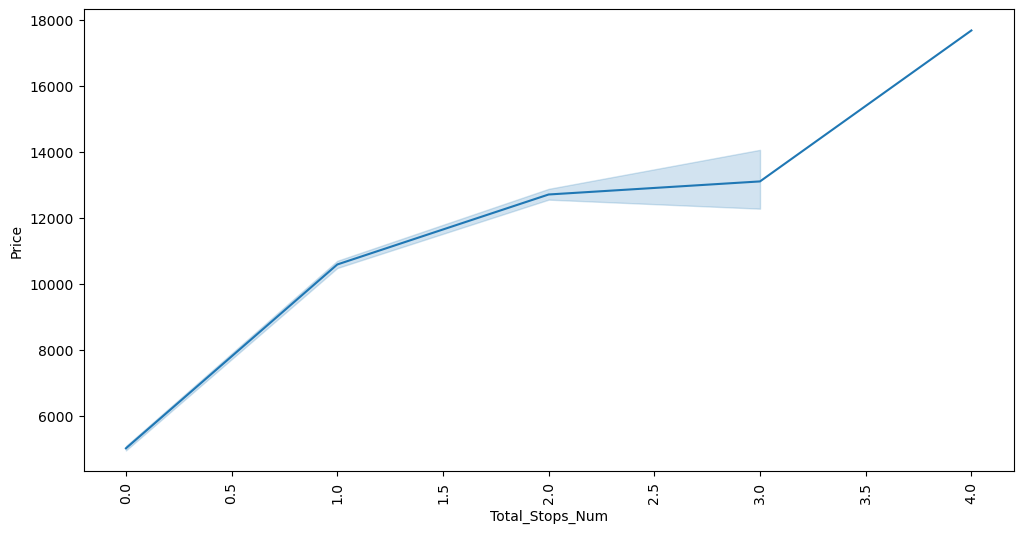

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.lineplot(x='Total_Stops_Num',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops_Num', ylabel='Price'>

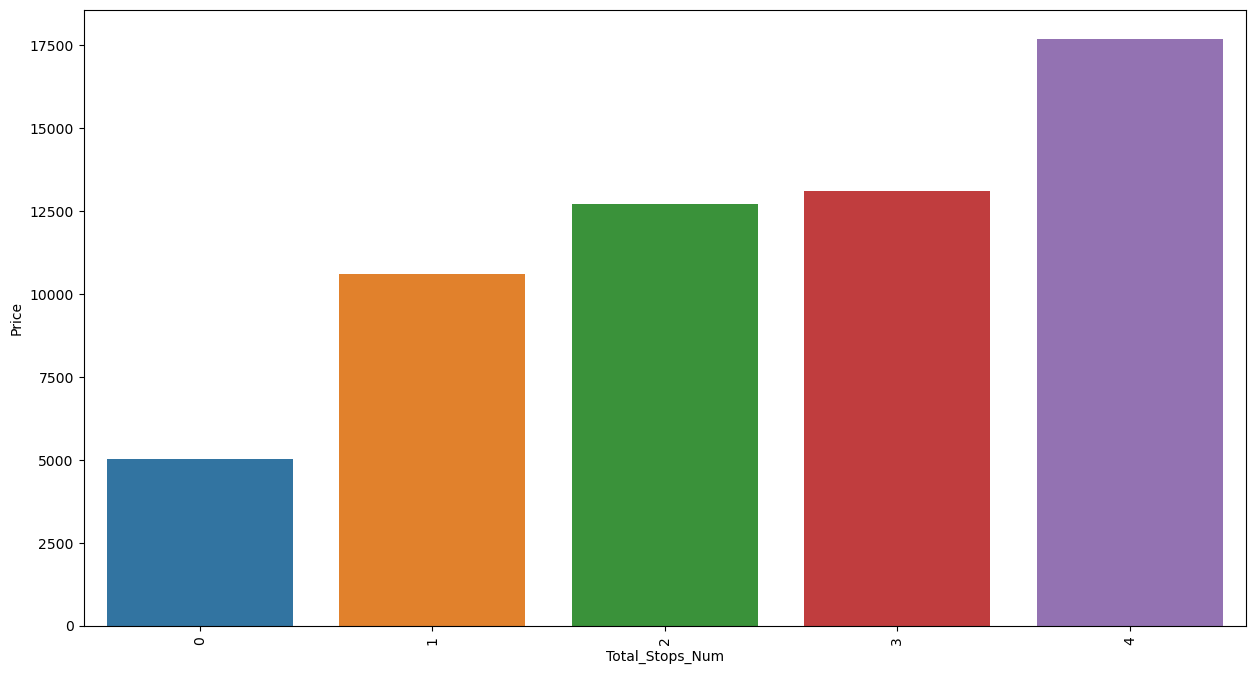

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.barplot(x='Total_Stops_Num',y='Price',data=df,ci=None)

In [32]:
# Split the dataset into training and testing sets
x = df.drop('Price', axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [33]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)


RandomForestRegressor(random_state=42)

In [34]:
# Predict flight fares for testing set
y_pred = rf.predict(X_test)

In [35]:
rf.predict([[24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0]])

array([5117.28885714])

In [36]:
# Evaluate the model performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 609.4875785925067
Mean Squared Error: 1067442.2190628392
R-squared: 0.948757339213459


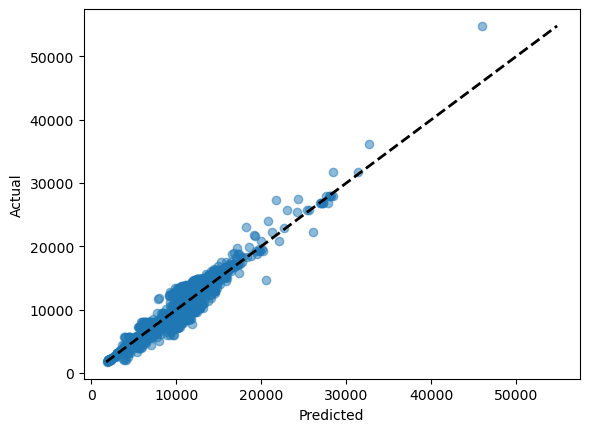

In [37]:
import matplotlib.pyplot as plt

# Assume y_pred is a NumPy array or Pandas series of predicted values, and y_true is a NumPy array or Pandas series of true values

# Create a scatter plot of predicted vs. actual values
plt.scatter(y_pred, y_test, alpha=0.5)

# Add a diagonal line to the plot for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set the x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


In [38]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)
file.close()

In [39]:
# model = open('flight_rf.pkl','rb')
# forest = pickle.load(model)
# y_prediction = forest.predict(X_test)
# r2_score(y_test, y_prediction)